## Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-0.67543996, -0.94934143],
       [ 1.16075219,  0.35993877],
       [-0.19835863,  0.44884956],
       ...,
       [-2.20482519,  1.68693078],
       [-0.26717907,  0.49432982],
       [ 1.2925763 ,  0.61870207]])

In [5]:
y

array([-2.85166476e+01,  1.70058845e+01,  1.08831011e+01, -3.98990515e+00,
        4.99664156e-01, -5.74629016e+01, -2.20670383e+01,  5.25125678e+00,
        2.98690258e+01,  1.22687495e+01, -6.63801858e+01,  2.27201145e+01,
       -3.47611614e+01, -3.10800272e+00, -2.43201986e+01, -3.91377427e+01,
        1.06258040e+01, -5.88386396e+00,  6.06497998e+01, -5.75681575e+00,
       -1.21207342e+00, -2.17440745e+01, -2.55002403e+01,  1.74389082e+01,
        3.77654769e+01,  3.99891572e+01,  4.34649373e+01,  1.56214038e+01,
       -2.15848943e+01, -5.80221929e+01, -4.53073228e+01,  2.60918085e+01,
        5.24720540e+01,  4.60134931e+01, -2.06792235e+01,  2.68742429e+01,
        1.58849986e+01,  5.22131314e+00, -1.60769413e+01, -2.23979952e+01,
       -2.19247756e+01,  2.11393201e+01, -2.46358911e+00, -1.65358110e+01,
       -1.16847586e+01,  4.17274747e+01,  2.51595738e+01,  4.70186402e+00,
        3.11868965e+01,  1.71528662e+01,  3.41503151e+01, -3.57557316e+01,
        4.51864861e+00,  

In [6]:
pd.DataFrame(X)[0]

0     -0.675440
1      1.160752
2     -0.198359
3      0.278004
4      0.133512
         ...   
995    0.723915
996    0.363590
997   -2.204825
998   -0.267179
999    1.292576
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

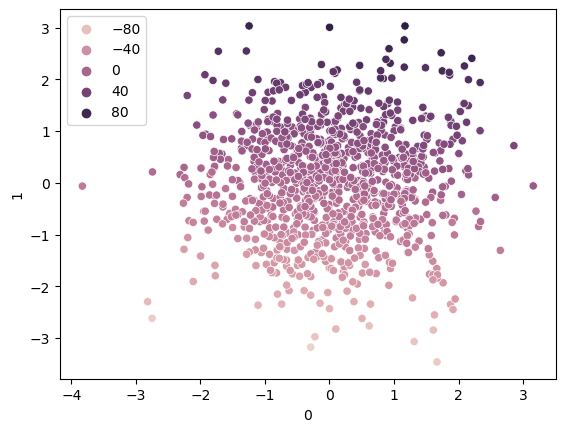

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[ 4.79607275, 28.23871752]])

In [13]:
## Prediction
y_pred=svr.predict(X_test)

In [14]:
y_pred

array([  6.9736661 , -23.80002684,  -7.98412594, -31.08232574,
        -5.14955983,  30.47440054, -42.4699799 ,  -7.14424642,
        26.04910553,   7.80929397,  35.15913202,  30.35524822,
        19.02783898,   9.83681246,   0.103113  ,  42.06325678,
        52.38451149,  52.14154492,  -5.12741343,  16.04602644,
       -50.92748603, -12.91186223,  16.16955923,  -0.42686906,
        10.87816902,  10.08959086,  -0.22429323, -45.26279463,
         4.84956239,  -2.75791196, -11.73914144, -25.24792868,
        -1.24285259,  -2.98520121, -36.7445216 ,  18.81566166,
        43.06408081,   3.46684154,  18.00189804,  11.08021807,
        45.42171329,   4.56514644, -32.07997959, -24.02589096,
       -21.77491546, -27.58026409, -15.15737535,  10.35745795,
        41.09280225,  -1.84561217,  13.96453937,  50.73591836,
       -21.2297057 ,  22.95470617,   9.96045207,  48.76925323,
        47.80854701,  68.89056529,   4.33238641, -27.33660028,
       -19.19408789,  17.76744813,  -6.79559022, -27.89

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9874836596212992


## Hyperparametere Tuning With SVR

In [17]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [18]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.990 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.990 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.991 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.992 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.990 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.990 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.991 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.992 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.990 total time=   0.0s
[CV 3/5] END C=1, e

[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.990 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.991 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.992 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.990 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.990 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.991 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.992 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.3, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.3, gamma=1, kernel=linear;, score=0.990 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.3, gamma=1, kernel=linear;, score=0.990 total time=   

[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.992 total time=   0.1s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.990 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.990 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.991 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.992 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.990 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.990 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.991 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.992 tot

[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.991 total time=   0.5s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.992 total time=   0.6s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [21]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9876024011024058
